# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
import api_keys

# Use citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

In [4]:
# Create empty lists to append the API data into lists / Openweathermap.org
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=victoria
Processing Record 2 | Pontianak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=pontianak
Processing Record 3 | Sao Joao da Barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=sao%20joao%20da%20barra
Processing Record 4 | Ginda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=ginda
Processing Record 5 | Saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=saldanha
City not found. Skipping...
City not found. Skipping...
Processing Record 6 | Kaka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=kaka
Processing Record

Processing Record 56 | Faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=faya
Processing Record 57 | Kapchorwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=kapchorwa
Processing Record 58 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=carnarvon
Processing Record 59 | Murdochville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=murdochville
Processing Record 60 | Zelenokumsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=zelenokumsk
Processing Record 61 | Roald
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=roald
Processing Record 62 | Kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cd

Processing Record 113 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=new%20norfolk
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 114 | Tres Arroyos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=tres%20arroyos
City not found. Skipping...
Processing Record 115 | Tomatlan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=tomatlan
Processing Record 116 | Solok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=solok
City not found. Skipping...
Processing Record 117 | Bad Langensalza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=bad%20langensalza
Processing Record 118 | Wanning
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc3334

Processing Record 167 | Kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=kavieng
Processing Record 168 | Lima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=lima
Processing Record 169 | Hosdurga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=hosdurga
Processing Record 170 | Tabou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=tabou
Processing Record 171 | Shingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=shingu
Processing Record 172 | Humboldt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=humboldt
Processing Record 173 | Sao Filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=sao%20filipe

City not found. Skipping...
Processing Record 223 | Beaufort
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=beaufort
City not found. Skipping...
Processing Record 224 | Juba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=juba
Processing Record 225 | Constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=constitucion
Processing Record 226 | Ust-Kuyga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=ust-kuyga
Processing Record 227 | Yerkoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=yerkoy
Processing Record 228 | Turukhansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=turukhansk
Processing Record 229 | Aklavik
http://api.openweathermap.org/data/2.5/w

City not found. Skipping...
Processing Record 279 | Pakxe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=pakxe
Processing Record 280 | Henties Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=henties%20bay
Processing Record 281 | Beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=beringovskiy
Processing Record 282 | Vanimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=vanimo
City not found. Skipping...
Processing Record 283 | Jalu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=jalu
Processing Record 284 | Ziarat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=ziarat
Processing Record 285 | Carroll
http://api.openweathermap.org/data/2.5/weather?u

Processing Record 335 | Biograd na Moru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=biograd%20na%20moru
Processing Record 336 | Lejamani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=lejamani
Processing Record 337 | Phetchabun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=phetchabun
Processing Record 338 | Saint George
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=saint%20george
Processing Record 339 | Flin Flon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=flin%20flon
Processing Record 340 | Sobolevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=sobolevo
Processing Record 341 | Pochutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Processing Record 391 | Ola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=ola
Processing Record 392 | Haines Junction
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=haines%20junction
Processing Record 393 | Marsa Matruh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=marsa%20matruh
Processing Record 394 | Luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=luderitz
City not found. Skipping...
Processing Record 395 | Raudeberg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=raudeberg
Processing Record 396 | Eregli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=eregli
Processing Record 397 | Ngunguru
http://api.openweathermap.org/data/2.5/weather?units=Im

Processing Record 445 | Coromandel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=coromandel
Processing Record 446 | Kampong Chhnang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=kampong%20chhnang
Processing Record 447 | Koslan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=koslan
Processing Record 448 | Guasdualito
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=guasdualito
City not found. Skipping...
Processing Record 449 | Lalmohan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=lalmohan
Processing Record 450 | Arica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=arica
Processing Record 451 | Graciano Sanchez
http://api.openweathermap.org/data/2.5/weathe

Processing Record 501 | Kinshasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=kinshasa
Processing Record 502 | Sulam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=sulam
Processing Record 503 | Richards Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=richards%20bay
Processing Record 504 | Lamesa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=lamesa
Processing Record 505 | Bumba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=bumba
City not found. Skipping...
Processing Record 506 | Slave Lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=slave%20lake
Processing Record 507 | Talara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc

Processing Record 556 | Alibunar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=alibunar
Processing Record 557 | Phangnga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=phangnga
City not found. Skipping...
City not found. Skipping...
Processing Record 558 | Chara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=chara
Processing Record 559 | Sabang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=sabang
Processing Record 560 | Gueret
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=gueret
Processing Record 561 | Massaguet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc33342e92963d4b018d3874d296cdc&q=massaguet
Processing Record 562 | Suoyarvi
http://api.openweathermap.org/data/2.5/weather?units=

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

In [9]:
# Save data frame to CSV
weather_data.to_csv('Output_CSV/weather_data.csv')

In [10]:
# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Victoria,75,BN,1562451888,94,5.28,115.24,77.00,1.45
1,Pontianak,4,ID,1562451889,75,-0.02,109.34,82.47,6.93
2,Sao Joao da Barra,0,BR,1562451891,56,-21.64,-41.05,68.00,13.87
3,Ginda,23,IN,1562451892,85,30.69,78.49,62.29,1.79
4,Saldanha,0,PT,1562451894,63,41.42,-6.55,68.23,11.27


In [17]:
# Display count of Weathwr data values
print(weather_data.count())

City          569
Cloudiness    569
Country       569
Date          569
Humidity      569
Lat           569
Lng           569
Max Temp      569
Wind Speed    569
dtype: int64


In [23]:
# Print the city count to confirm sufficient count
print(len(city_name))

569


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

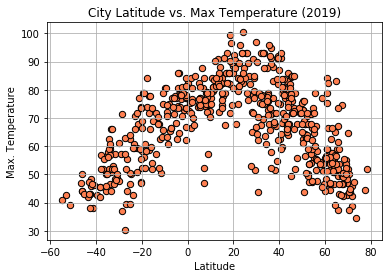

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=40, edgecolors = "black", color = "coral")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2019)")
plt.ylabel("Max. Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Need to save plot
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")
# Show plot
plt.show()

#### Latitude vs. Humidity Plot

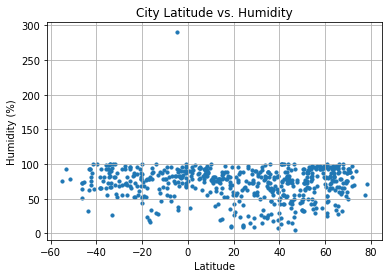

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

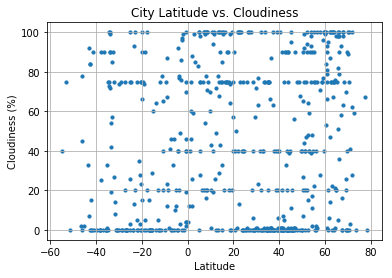

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

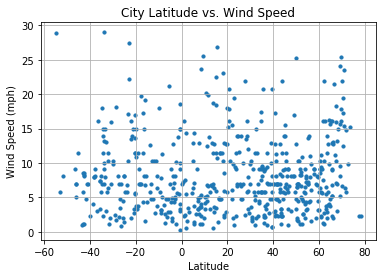

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()